# Data filtering

In [1]:
import pandas as pd
data = pd.read_csv("Banknifty1.csv", dtype={'Change in OI': int}, na_values=['-'])
data.rename(columns={'Symbol  ': 'Symbol', 'Date  ': 'Date','Expiry  ':'Expiry','Option type  ':'Option type','Strike Price  ':'Strike Price','Open  ':'Open','High  ':'High','Low  ':'Low','Close  ':'Close','LTP  ':'LTP','Settle Price  ':'Settle Price', 'No. of contracts  ':'No. of contracts','Turnover in Lakhs':'Turnover in Lakhs','Open Int  ':'Open Int','Change in OI  ':'Change in OI','Underlying Value  ':'Underlying Value'},inplace=True)
data = data.dropna(subset=['Underlying Value'])
data = data.reset_index(drop=True)
data

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value,Turnover in Lakhs,Premium Turnover in Lakhs
0,BANKNIFTY,03-Dec-2014,24-Dec-2014,CE,13600.0,NaN,NaN,NaN,5032.95,5032.95,5112.55,NaN,NaN,NaN,4175.0,NaN,18645.85,NaN,NaN
1,BANKNIFTY,03-Dec-2014,24-Dec-2014,CE,13700.0,4829.4,4829.4,4829.4,4829.40,4829.40,4829.40,1.0,4.63,120735.0,2675.0,25.0,18645.85,NaN,NaN
2,BANKNIFTY,03-Dec-2014,24-Dec-2014,CE,13800.0,NaN,NaN,NaN,1930.40,NaN,4913.50,NaN,NaN,NaN,NaN,NaN,18645.85,NaN,NaN
3,BANKNIFTY,03-Dec-2014,24-Dec-2014,CE,13900.0,NaN,NaN,NaN,1849.10,NaN,4814.00,NaN,NaN,NaN,NaN,NaN,18645.85,NaN,NaN
4,BANKNIFTY,03-Dec-2014,24-Dec-2014,CE,14000.0,NaN,NaN,NaN,4512.10,4512.10,4714.50,NaN,NaN,NaN,10600.0,NaN,18645.85,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303973,BANKNIFTY,31-Dec-18,28-Mar-19,CE,25700.0,NaN,NaN,NaN,1994.65,NaN,2163.55,NaN,NaN,NaN,NaN,NaN,27160.20,NaN,NaN
303974,BANKNIFTY,31-Dec-18,28-Mar-19,CE,25600.0,NaN,NaN,NaN,2067.25,NaN,2241.70,NaN,NaN,NaN,NaN,NaN,27160.20,NaN,NaN
303975,BANKNIFTY,31-Dec-18,28-Mar-19,CE,25500.0,NaN,NaN,NaN,2142.10,NaN,2321.15,NaN,NaN,NaN,NaN,NaN,27160.20,NaN,NaN
303976,BANKNIFTY,31-Dec-18,28-Mar-19,CE,25400.0,NaN,NaN,NaN,2218.25,NaN,2401.75,NaN,NaN,NaN,NaN,NaN,27160.20,NaN,NaN


In [2]:
underlying = pd.read_csv("Nifty Bank Historical Data.csv", dtype={'Change in OI': int}, na_values=['-'])
underlying = underlying.iloc[::-1]
selected_columns = ['Date','Open','High','Low','Close']
underlying = underlying.reset_index(drop=True)
underlying[selected_columns]

,Date,Open,High,Low,Close
0,12/3/2014,"18,549.75","18,723.65","18,518.00","18,645.85"
1,12/4/2014,"18,758.80","18,793.15","18,575.35","18,782.85"
2,12/5/2014,"18,827.60","18,875.45","18,706.25","18,756.75"
3,12/8/2014,"18,804.95","18,804.95","18,486.55","18,510.05"
4,12/9/2014,"18,499.95","18,585.35","18,248.10","18,290.65"
...,...,...,...,...,...
1004,12/24/2018,"26,877.05","26,934.85","26,676.95","26,714.75"
1005,12/26/2018,"26,634.00","27,029.15","26,408.15","26,986.80"
1006,12/27/2018,"27,200.65","27,239.95","26,845.10","26,878.55"
1007,12/28/2018,"27,048.40","27,213.45","27,039.60","27,125.25"


In [3]:
#Adding a column containing the underlying close value of the past 20 trading days:
data.loc[:, 'Date'] = pd.to_datetime(data.loc[:, 'Date'])
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
underlying.loc[:, 'Date'] = pd.to_datetime(underlying.loc[:, 'Date'])
# Convert 'Date' column to the desired format
underlying['Date'] = underlying['Date'].dt.strftime('%Y-%m-%d')
selected_columns = ['Date','Open','High','Low','Close']
extracted= underlying[selected_columns]
D_U=extracted.groupby('Date')
w=list(D_U.groups.keys())   #list containing all the dates, ordered.
data['last20_Close'] = None
L=[]
p=''
i=0
for start_date in data['Date']:
    if(start_date==p and(L!='')):
        data.at[i, 'last20_Close'] = L

    else:
        L=[]
        p=start_date
        j=1
        while j<=20:
            j_thprevious=w[w.index(start_date) - j]
            L.append(D_U.get_group(j_thprevious)['Close'].iloc[0])
            j+=1
        data.at[i, 'last20_Close'] = L
    i+=1

In [4]:
#Adding a column containing the underlying Open value of the past 20 trading days:
selected_columns = ['Date','Open','High','Low','Open']
extracted= underlying[selected_columns]
D_U=extracted.groupby('Date')
w=list(D_U.groups.keys())   #list containing all the dates, ordered.
data['last20_Open'] = None
L=[]
p=''
i=0
for start_date in data['Date']:
    if(start_date==p and(L!='')):
        data.at[i, 'last20_Open'] = L

    else:
        L=[]
        p=start_date
        j=1
        while j<=20:
            j_thprevious=w[w.index(start_date) - j]
            L.append(D_U.get_group(j_thprevious)['Open'].iloc[0])
            j+=1
        data.at[i, 'last20_Open'] = L
    i+=1

In [5]:
#Adding a column containing the underlying High value of the past 20 trading days:
selected_columns = ['Date','Open','High','Low']
extracted= underlying[selected_columns]
D_U=extracted.groupby('Date')
w=list(D_U.groups.keys())   #list containing all the dates, ordered.
data['last20_High'] = None
L=[]
p=''
i=0
for start_date in data['Date']:
    if(start_date==p and(L!='')):
        data.at[i, 'last20_High'] = L

    else:
        L=[]
        p=start_date
        j=1
        while j<=20:
            j_thprevious=w[w.index(start_date) - j]
            L.append(D_U.get_group(j_thprevious)['High'].iloc[0])
            j+=1
        data.at[i, 'last20_High'] = L
    i+=1

In [6]:
#Adding a column containing the underlying Low value of the past 20 trading days:
selected_columns = ['Date','Low']
extracted= underlying[selected_columns]
D_U=extracted.groupby('Date')
w=list(D_U.groups.keys())   #list containing all the dates, ordered.
data['last20_Low'] = None
L=[]
p=''
i=0
for start_date in data['Date']:
    if(start_date==p and(L!='')):
        data.at[i, 'last20_Low'] = L

    else:
        L=[]
        p=start_date
        j=1
        while j<=20:
            j_thprevious=w[w.index(start_date) - j]
            L.append(D_U.get_group(j_thprevious)['Low'].iloc[0])
            j+=1
        data.at[i, 'last20_Low'] = L
    i+=1

In [9]:
"""#Adding a column containing the underlying value of the past 20 trading days:
data.loc[:, 'Date'] = pd.to_datetime(data.loc[:, 'Date'])
selected_columns = ['Date','Underlying Value']
extracted= data[selected_columns]
D_U=extracted.groupby('Date')
w=list(D_U.groups.keys())   #list containing all the dates, ordered.
data['Last_20days'] = None
L=[]
p=''
i=0
for start_date in data['Date']:
    if(start_date==p and(L!='')):
        data.at[i, 'Last_20days'] = L

    else:
        L=[]
        p=start_date
        j=1
        while j<=20:
            j_thprevious=w[w.index(start_date) - j]
            L.append(D_U.get_group(j_thprevious)['Underlying Value'].iloc[0])
            j+=1
        data.at[i, 'Last_20days'] = L
    i+=1"""

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

#Filter and remove columns that are before January 1st, 2015
january_2015 = pd.to_datetime('2015-01-01')
data = data[data['Date'] >= january_2015]
data = data.reset_index(drop=True)
data

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,...,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value,Turnover in Lakhs,Premium Turnover in Lakhs,last20_Close,last20_Open,last20_High,last20_Low
0,BANKNIFTY,2015-01-01,29-Jan-15,CE,20400.0,30.00,30.00,22.00,25.10,25.6,...,NaN,54125.0,4225.0,18750.45,3844.99,469107.50,"[18,736.65, 18,647.55, 18,528.35, 18,557.20, 1...","[[18,659.60, 18,659.60], [18,573.25, 18,573.25...","[18,774.20, 18,671.95, 18,700.70, 18,681.75, 1...","[18,659.60, 18,428.10, 18,501.05, 18,448.60, 1..."
1,BANKNIFTY,2015-01-01,29-Jan-15,CE,20300.0,NaN,NaN,NaN,34.00,34.0,...,NaN,2350.0,NaN,18750.45,NaN,NaN,"[18,736.65, 18,647.55, 18,528.35, 18,557.20, 1...","[[18,659.60, 18,659.60], [18,573.25, 18,573.25...","[18,774.20, 18,671.95, 18,700.70, 18,681.75, 1...","[18,659.60, 18,428.10, 18,501.05, 18,448.60, 1..."
2,BANKNIFTY,2015-01-01,29-Jan-15,CE,20200.0,39.05,44.95,39.05,44.60,44.3,...,NaN,4350.0,25.0,18750.45,263.18,57508.75,"[18,736.65, 18,647.55, 18,528.35, 18,557.20, 1...","[[18,659.60, 18,659.60], [18,573.25, 18,573.25...","[18,774.20, 18,671.95, 18,700.70, 18,681.75, 1...","[18,659.60, 18,428.10, 18,501.05, 18,448.60, 1..."
3,BANKNIFTY,2015-01-01,29-Jan-15,CE,20000.0,54.00,65.00,46.50,61.30,62.2,...,NaN,280825.0,15325.0,18750.45,26341.35,7634987.50,"[18,736.65, 18,647.55, 18,528.35, 18,557.20, 1...","[[18,659.60, 18,659.60], [18,573.25, 18,573.25...","[18,774.20, 18,671.95, 18,700.70, 18,681.75, 1...","[18,659.60, 18,428.10, 18,501.05, 18,448.60, 1..."
4,BANKNIFTY,2015-01-01,29-Jan-15,CE,19900.0,70.90,77.45,70.90,75.30,77.0,...,NaN,15200.0,300.0,18750.45,204.74,76446.25,"[18,736.65, 18,647.55, 18,528.35, 18,557.20, 1...","[[18,659.60, 18,659.60], [18,573.25, 18,573.25...","[18,774.20, 18,671.95, 18,700.70, 18,681.75, 1...","[18,659.60, 18,428.10, 18,501.05, 18,448.60, 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300846,BANKNIFTY,2018-12-31,28-Mar-19,CE,25700.0,NaN,NaN,NaN,1994.65,NaN,...,NaN,NaN,NaN,27160.20,NaN,NaN,"[27,125.25, 26,878.55, 26,986.80, 26,714.75, 2...","[[27,048.40, 27,048.40], [27,200.65, 27,200.65...","[27,213.45, 27,239.95, 27,029.15, 26,934.85, 2...","[27,039.60, 26,845.10, 26,408.15, 26,676.95, 2..."
300847,BANKNIFTY,2018-12-31,28-Mar-19,CE,25600.0,NaN,NaN,NaN,2067.25,NaN,...,NaN,NaN,NaN,27160.20,NaN,NaN,"[27,125.25, 26,878.55, 26,986.80, 26,714.75, 2...","[[27,048.40, 27,048.40], [27,200.65, 27,200.65...","[27,213.45, 27,239.95, 27,029.15, 26,934.85, 2...","[27,039.60, 26,845.10, 26,408.15, 26,676.95, 2..."
300848,BANKNIFTY,2018-12-31,28-Mar-19,CE,25500.0,NaN,NaN,NaN,2142.10,NaN,...,NaN,NaN,NaN,27160.20,NaN,NaN,"[27,125.25, 26,878.55, 26,986.80, 26,714.75, 2...","[[27,048.40, 27,048.40], [27,200.65, 27,200.65...","[27,213.45, 27,239.95, 27,029.15, 26,934.85, 2...","[27,039.60, 26,845.10, 26,408.15, 26,676.95, 2..."
300849,BANKNIFTY,2018-12-31,28-Mar-19,CE,25400.0,NaN,NaN,NaN,2218.25,NaN,...,NaN,NaN,NaN,27160.20,NaN,NaN,"[27,125.25, 26,878.55, 26,986.80, 26,714.75, 2...","[[27,048.40, 27,048.40], [27,200.65, 27,200.65...","[27,213.45, 27,239.95, 27,029.15, 26,934.85, 2...","[27,039.60, 26,845.10, 26,408.15, 26,676.95, 2..."


In [8]:
#adding output column:
output=100*data['Close']/data['Strike Price']
data = data.assign(Output=output)
#Labeling the data
L=[]
for value in output:
    L.append(int(value/0.1))
p=pd.Series(L)
data['category']=p
data

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,...,Change in OI,Underlying Value,Turnover in Lakhs,Premium Turnover in Lakhs,last20_Close,last20_Open,last20_High,last20_Low,Output,category
0,BANKNIFTY,2015-01-01,29-Jan-15,CE,20400.0,30.00,30.00,22.00,25.10,25.6,...,4225.0,18750.45,3844.99,469107.50,"[18,736.65, 18,647.55, 18,528.35, 18,557.20, 1...","[[18,659.60, 18,659.60], [18,573.25, 18,573.25...","[18,774.20, 18,671.95, 18,700.70, 18,681.75, 1...","[18,659.60, 18,428.10, 18,501.05, 18,448.60, 1...",0.123039,1
1,BANKNIFTY,2015-01-01,29-Jan-15,CE,20300.0,NaN,NaN,NaN,34.00,34.0,...,NaN,18750.45,NaN,NaN,"[18,736.65, 18,647.55, 18,528.35, 18,557.20, 1...","[[18,659.60, 18,659.60], [18,573.25, 18,573.25...","[18,774.20, 18,671.95, 18,700.70, 18,681.75, 1...","[18,659.60, 18,428.10, 18,501.05, 18,448.60, 1...",0.167488,1
2,BANKNIFTY,2015-01-01,29-Jan-15,CE,20200.0,39.05,44.95,39.05,44.60,44.3,...,25.0,18750.45,263.18,57508.75,"[18,736.65, 18,647.55, 18,528.35, 18,557.20, 1...","[[18,659.60, 18,659.60], [18,573.25, 18,573.25...","[18,774.20, 18,671.95, 18,700.70, 18,681.75, 1...","[18,659.60, 18,428.10, 18,501.05, 18,448.60, 1...",0.220792,2
3,BANKNIFTY,2015-01-01,29-Jan-15,CE,20000.0,54.00,65.00,46.50,61.30,62.2,...,15325.0,18750.45,26341.35,7634987.50,"[18,736.65, 18,647.55, 18,528.35, 18,557.20, 1...","[[18,659.60, 18,659.60], [18,573.25, 18,573.25...","[18,774.20, 18,671.95, 18,700.70, 18,681.75, 1...","[18,659.60, 18,428.10, 18,501.05, 18,448.60, 1...",0.306500,3
4,BANKNIFTY,2015-01-01,29-Jan-15,CE,19900.0,70.90,77.45,70.90,75.30,77.0,...,300.0,18750.45,204.74,76446.25,"[18,736.65, 18,647.55, 18,528.35, 18,557.20, 1...","[[18,659.60, 18,659.60], [18,573.25, 18,573.25...","[18,774.20, 18,671.95, 18,700.70, 18,681.75, 1...","[18,659.60, 18,428.10, 18,501.05, 18,448.60, 1...",0.378392,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300846,BANKNIFTY,2018-12-31,28-Mar-19,CE,25700.0,NaN,NaN,NaN,1994.65,NaN,...,NaN,27160.20,NaN,NaN,"[27,125.25, 26,878.55, 26,986.80, 26,714.75, 2...","[[27,048.40, 27,048.40], [27,200.65, 27,200.65...","[27,213.45, 27,239.95, 27,029.15, 26,934.85, 2...","[27,039.60, 26,845.10, 26,408.15, 26,676.95, 2...",7.761284,77
300847,BANKNIFTY,2018-12-31,28-Mar-19,CE,25600.0,NaN,NaN,NaN,2067.25,NaN,...,NaN,27160.20,NaN,NaN,"[27,125.25, 26,878.55, 26,986.80, 26,714.75, 2...","[[27,048.40, 27,048.40], [27,200.65, 27,200.65...","[27,213.45, 27,239.95, 27,029.15, 26,934.85, 2...","[27,039.60, 26,845.10, 26,408.15, 26,676.95, 2...",8.075195,80
300848,BANKNIFTY,2018-12-31,28-Mar-19,CE,25500.0,NaN,NaN,NaN,2142.10,NaN,...,NaN,27160.20,NaN,NaN,"[27,125.25, 26,878.55, 26,986.80, 26,714.75, 2...","[[27,048.40, 27,048.40], [27,200.65, 27,200.65...","[27,213.45, 27,239.95, 27,029.15, 26,934.85, 2...","[27,039.60, 26,845.10, 26,408.15, 26,676.95, 2...",8.400392,84
300849,BANKNIFTY,2018-12-31,28-Mar-19,CE,25400.0,NaN,NaN,NaN,2218.25,NaN,...,NaN,27160.20,NaN,NaN,"[27,125.25, 26,878.55, 26,986.80, 26,714.75, 2...","[[27,048.40, 27,048.40], [27,200.65, 27,200.65...","[27,213.45, 27,239.95, 27,029.15, 26,934.85, 2...","[27,039.60, 26,845.10, 26,408.15, 26,676.95, 2...",8.733268,87


In [9]:
#Adding the close column of the previous day of the beginning of the contract
from datetime import datetime, timedelta
data.loc[:, 'Date'] = pd.to_datetime(data.loc[:, 'Date'])
selected_columns = ['Date', 'Expiry','Strike Price', 'Close']
extracted= data[selected_columns]
K_C=extracted.groupby('Date')
c=[]


In [10]:
#Get the data corresponding the day before and check if there is a contract with the same Expiry and Strike price, if it exists,
#We get the Close price corresponding to that index, else we assign 0.
for s in range(len(data)):
    start_date=data.loc[s,'Date']
    k=data.loc[s,'Strike Price']
    start_date = start_date - timedelta(days=1)
    if start_date in list(K_C.groups.keys()):    
        X=K_C.get_group(start_date)      #get the part of the groupped data for this date
        i = X['Strike Price'][(X['Strike Price'] == k) & (X['Expiry'] == data.loc[s, 'Expiry'])].index 
        if len(i)>0:         
            close=X.loc[i, 'Close']      #get the close price corresponding to that option contract
            c.append(close.iloc[0])  #add the value to the list c
        else:
            c.append(0)
    else:
        c.append(0)

In [11]:
#Remove the rows that do are not traded on the previous day of the beginning of the contract
previous_day_close = pd.Series(c, name='previous day close')
data['A day before_Close']=previous_day_close 
data=data[data['A day before_Close'] != 0]
data

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,...,Underlying Value,Turnover in Lakhs,Premium Turnover in Lakhs,last20_Close,last20_Open,last20_High,last20_Low,Output,category,A day before_Close
131,BANKNIFTY,2015-01-02,29-Jan-15,CE,20300.0,39.00,65.85,39.00,57.50,60.0,...,19057.80,2381.58,6.481325e+05,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.283251,2,34.00
132,BANKNIFTY,2015-01-02,29-Jan-15,CE,20200.0,46.45,82.75,46.45,69.65,73.0,...,19057.80,2680.51,9.063700e+05,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.344802,3,44.60
133,BANKNIFTY,2015-01-02,29-Jan-15,CE,20400.0,27.00,54.00,26.05,45.25,47.0,...,19057.80,36485.18,8.137611e+06,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.221814,2,25.10
134,BANKNIFTY,2015-01-02,29-Jan-15,CE,20100.0,59.95,98.95,58.65,90.00,94.0,...,19057.80,3179.11,1.335741e+06,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.447761,4,49.55
135,BANKNIFTY,2015-01-02,29-Jan-15,CE,20000.0,51.40,120.00,51.40,105.95,110.0,...,19057.80,230915.16,1.145158e+08,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.529750,5,61.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298929,BANKNIFTY,2018-12-13,28-Feb-19,CE,28400.0,NaN,NaN,NaN,677.65,NaN,...,26816.35,NaN,NaN,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",2.386092,23,677.65
298930,BANKNIFTY,2018-12-13,28-Feb-19,CE,28000.0,NaN,NaN,NaN,824.35,NaN,...,26816.35,NaN,NaN,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",2.944107,29,824.35
298931,BANKNIFTY,2018-12-13,28-Feb-19,CE,28500.0,NaN,NaN,NaN,644.25,NaN,...,26816.35,NaN,NaN,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",2.260526,22,644.25
298932,BANKNIFTY,2018-12-13,28-Feb-19,CE,24900.0,NaN,NaN,NaN,2263.20,NaN,...,26816.35,NaN,NaN,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",9.089157,90,2263.20


In [12]:
#We remove the contracts that are not traded
data = data.dropna(subset=['Open'])
data

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,...,Underlying Value,Turnover in Lakhs,Premium Turnover in Lakhs,last20_Close,last20_Open,last20_High,last20_Low,Output,category,A day before_Close
131,BANKNIFTY,2015-01-02,29-Jan-15,CE,20300.0,39.00,65.85,39.00,57.50,60.00,...,19057.80,2381.58,6.481325e+05,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.283251,2,34.00
132,BANKNIFTY,2015-01-02,29-Jan-15,CE,20200.0,46.45,82.75,46.45,69.65,73.00,...,19057.80,2680.51,9.063700e+05,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.344802,3,44.60
133,BANKNIFTY,2015-01-02,29-Jan-15,CE,20400.0,27.00,54.00,26.05,45.25,47.00,...,19057.80,36485.18,8.137611e+06,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.221814,2,25.10
134,BANKNIFTY,2015-01-02,29-Jan-15,CE,20100.0,59.95,98.95,58.65,90.00,94.00,...,19057.80,3179.11,1.335741e+06,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.447761,4,49.55
135,BANKNIFTY,2015-01-02,29-Jan-15,CE,20000.0,51.40,120.00,51.40,105.95,110.00,...,19057.80,230915.16,1.145158e+08,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.529750,5,61.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298832,BANKNIFTY,2018-12-13,31-Jan-19,CE,26000.0,1135.00,1315.00,1130.15,1194.45,1200.00,...,26816.35,1006.84,4.484000e+01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",4.594038,45,1109.20
298837,BANKNIFTY,2018-12-13,31-Jan-19,CE,27500.0,316.90,374.95,297.00,310.55,315.00,...,26816.35,5652.38,6.988000e+01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",1.129273,11,281.30
298838,BANKNIFTY,2018-12-13,31-Jan-19,CE,27000.0,525.00,622.95,507.90,549.35,549.95,...,26816.35,8213.52,1.729200e+02,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",2.034630,20,493.85
298844,BANKNIFTY,2018-12-13,31-Jan-19,CE,28000.0,172.40,205.80,160.10,169.90,165.00,...,26816.35,2125.40,1.420000e+01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.606786,6,153.95


In [13]:
#Get only contracts which are near ATM with the predecided value 0.4 for the following difference
bool_ATM= abs(1-data['Underlying Value']/data['Strike Price'])<=0.4
data = data[bool_ATM.values]
data

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,...,Underlying Value,Turnover in Lakhs,Premium Turnover in Lakhs,last20_Close,last20_Open,last20_High,last20_Low,Output,category,A day before_Close
131,BANKNIFTY,2015-01-02,29-Jan-15,CE,20300.0,39.00,65.85,39.00,57.50,60.00,...,19057.80,2381.58,6.481325e+05,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.283251,2,34.00
132,BANKNIFTY,2015-01-02,29-Jan-15,CE,20200.0,46.45,82.75,46.45,69.65,73.00,...,19057.80,2680.51,9.063700e+05,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.344802,3,44.60
133,BANKNIFTY,2015-01-02,29-Jan-15,CE,20400.0,27.00,54.00,26.05,45.25,47.00,...,19057.80,36485.18,8.137611e+06,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.221814,2,25.10
134,BANKNIFTY,2015-01-02,29-Jan-15,CE,20100.0,59.95,98.95,58.65,90.00,94.00,...,19057.80,3179.11,1.335741e+06,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.447761,4,49.55
135,BANKNIFTY,2015-01-02,29-Jan-15,CE,20000.0,51.40,120.00,51.40,105.95,110.00,...,19057.80,230915.16,1.145158e+08,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.529750,5,61.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298832,BANKNIFTY,2018-12-13,31-Jan-19,CE,26000.0,1135.00,1315.00,1130.15,1194.45,1200.00,...,26816.35,1006.84,4.484000e+01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",4.594038,45,1109.20
298837,BANKNIFTY,2018-12-13,31-Jan-19,CE,27500.0,316.90,374.95,297.00,310.55,315.00,...,26816.35,5652.38,6.988000e+01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",1.129273,11,281.30
298838,BANKNIFTY,2018-12-13,31-Jan-19,CE,27000.0,525.00,622.95,507.90,549.35,549.95,...,26816.35,8213.52,1.729200e+02,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",2.034630,20,493.85
298844,BANKNIFTY,2018-12-13,31-Jan-19,CE,28000.0,172.40,205.80,160.10,169.90,165.00,...,26816.35,2125.40,1.420000e+01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.606786,6,153.95


In [16]:
#We remove contracts where time to maturity is longer than 45 days or smaller than 3 days
data.loc[:, 'Date'] = pd.to_datetime(data.loc[:, 'Date'])
data.loc[:, 'Expiry'] = pd.to_datetime(data.loc[:, 'Expiry'] )

date_difference = data['Expiry'] - data['Date']

# Create a pandas Series with True where the difference is between 3 and 45 days, and False elsewhere
result_series = (date_difference >= pd.Timedelta(days=3)) & (date_difference <= pd.Timedelta(days=45))
data = data[result_series.values]
data

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,...,Underlying Value,Turnover in Lakhs,Premium Turnover in Lakhs,last20_Close,last20_Open,last20_High,last20_Low,Output,category,A day before_Close
131,BANKNIFTY,2015-01-02,2015-01-29,CE,20300.0,39.00,65.85,39.00,57.50,60.0,...,19057.80,2381.58,6.481325e+05,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.283251,2,34.00
132,BANKNIFTY,2015-01-02,2015-01-29,CE,20200.0,46.45,82.75,46.45,69.65,73.0,...,19057.80,2680.51,9.063700e+05,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.344802,3,44.60
133,BANKNIFTY,2015-01-02,2015-01-29,CE,20400.0,27.00,54.00,26.05,45.25,47.0,...,19057.80,36485.18,8.137611e+06,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.221814,2,25.10
134,BANKNIFTY,2015-01-02,2015-01-29,CE,20100.0,59.95,98.95,58.65,90.00,94.0,...,19057.80,3179.11,1.335741e+06,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.447761,4,49.55
135,BANKNIFTY,2015-01-02,2015-01-29,CE,20000.0,51.40,120.00,51.40,105.95,110.0,...,19057.80,230915.16,1.145158e+08,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.529750,5,61.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298612,BANKNIFTY,2018-12-13,2018-12-27,CE,28300.0,8.15,16.05,8.15,14.70,14.7,...,26816.35,1109.89,5.300000e-01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.051943,0,10.85
298613,BANKNIFTY,2018-12-13,2018-12-27,CE,28400.0,8.00,11.55,6.55,8.85,8.6,...,26816.35,2517.14,9.000000e-01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.031162,0,9.20
298614,BANKNIFTY,2018-12-13,2018-12-27,CE,28500.0,6.80,10.20,6.40,7.75,6.4,...,26816.35,9179.63,2.630000e+00,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.027193,0,7.45
298615,BANKNIFTY,2018-12-13,2018-12-27,CE,28000.0,22.35,35.00,18.60,23.30,22.0,...,26816.35,95151.16,9.116000e+01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.083214,0,20.60


For reasons related to the construction of the models, we add a new column to the
filtered dataset that records the close price of the same option on the previous day. If the option contract did
not exist on the previous day, we report the value 0 in this new column. We subsequently screen the data to
remove all rows that have a zero in the new column. We then add more columns to the data array to include
the “Open”, “High”, “Low” and “Close” prices of the underlying asset for the past 20 days corresponding to each row. Further more, we add an additional column that gives us the three months’ government bond
yield rate

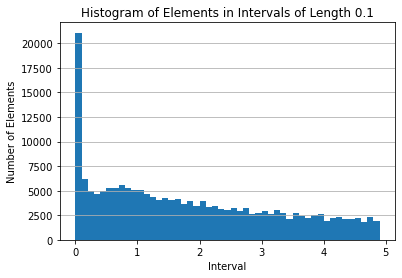

In [17]:
import matplotlib.pyplot as plt
# Create bins with intervals of length 0.1
bins = [i / 10 for i in range(50)]

# Use pd.cut to bin the data into intervals
interval_counts = pd.cut(output, bins=bins, right=False).value_counts(sort=False)

# Plot the histogram
interval_index = pd.IntervalIndex(interval_counts.index)
left_endpoints = interval_index.left

# Plot the histogram
plt.bar(left_endpoints, interval_counts.values, width=0.1, align='edge')
plt.xlabel('Interval')
plt.ylabel('Number of Elements')
plt.title('Histogram of Elements in Intervals of Length 0.1')
plt.grid(axis='y')
plt.show()

Features: Approach I:

In [18]:
#Time to maturity
date_difference = data['Expiry'] - data['Date']
data['Time to maturiy'] = date_difference
Moneyness=data['Underlying Value']/data['Strike Price']
data['Moneyness'] = Moneyness
data

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,...,Premium Turnover in Lakhs,last20_Close,last20_Open,last20_High,last20_Low,Output,category,A day before_Close,Time to maturiy,Moneyness
131,BANKNIFTY,2015-01-02,2015-01-29,CE,20300.0,39.00,65.85,39.00,57.50,60.0,...,6.481325e+05,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.283251,2,34.00,27 days,0.938808
132,BANKNIFTY,2015-01-02,2015-01-29,CE,20200.0,46.45,82.75,46.45,69.65,73.0,...,9.063700e+05,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.344802,3,44.60,27 days,0.943455
133,BANKNIFTY,2015-01-02,2015-01-29,CE,20400.0,27.00,54.00,26.05,45.25,47.0,...,8.137611e+06,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.221814,2,25.10,27 days,0.934206
134,BANKNIFTY,2015-01-02,2015-01-29,CE,20100.0,59.95,98.95,58.65,90.00,94.0,...,1.335741e+06,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.447761,4,49.55,27 days,0.948149
135,BANKNIFTY,2015-01-02,2015-01-29,CE,20000.0,51.40,120.00,51.40,105.95,110.0,...,1.145158e+08,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.529750,5,61.30,27 days,0.952890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298612,BANKNIFTY,2018-12-13,2018-12-27,CE,28300.0,8.15,16.05,8.15,14.70,14.7,...,5.300000e-01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.051943,0,10.85,14 days,0.947574
298613,BANKNIFTY,2018-12-13,2018-12-27,CE,28400.0,8.00,11.55,6.55,8.85,8.6,...,9.000000e-01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.031162,0,9.20,14 days,0.944238
298614,BANKNIFTY,2018-12-13,2018-12-27,CE,28500.0,6.80,10.20,6.40,7.75,6.4,...,2.630000e+00,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.027193,0,7.45,14 days,0.940925
298615,BANKNIFTY,2018-12-13,2018-12-27,CE,28000.0,22.35,35.00,18.60,23.30,22.0,...,9.116000e+01,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.083214,0,20.60,14 days,0.957727


In [19]:
data = data.reset_index(drop=True)

Order statistics:
assuming that we have an array containing the past 20 trading days values

In [42]:
def logreturn(L):
    for j in range(len(L)-1):
        L[j]=np.log(L[j+1]/L[j])
    return(L)

In [54]:
data1['Log_returns']=None
p=0
for i in data1['last20_Close']:
    i = [float(value.replace(',', '')) for value in i]
    i=logreturn(i)
    i.sort()
    data1.at[p, 'Log_returns'] = i
    p+=1
data1

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,...,last20_Close,last20_Open,last20_High,last20_Low,Output,category,A day before_Close,Time to maturiy,Moneyness,Log_returns
0,BANKNIFTY,2015-01-02,2015-01-29,CE,20300.0,39.00,65.85,39.00,57.50,60.0,...,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.283251,2,34.00,27 days,0.938808,"[-0.02546808425364105, -0.014422868462187556, ..."
1,BANKNIFTY,2015-01-02,2015-01-29,CE,20200.0,46.45,82.75,46.45,69.65,73.0,...,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.344802,3,44.60,27 days,0.943455,"[-0.02546808425364105, -0.014422868462187556, ..."
2,BANKNIFTY,2015-01-02,2015-01-29,CE,20400.0,27.00,54.00,26.05,45.25,47.0,...,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.221814,2,25.10,27 days,0.934206,"[-0.02546808425364105, -0.014422868462187556, ..."
3,BANKNIFTY,2015-01-02,2015-01-29,CE,20100.0,59.95,98.95,58.65,90.00,94.0,...,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.447761,4,49.55,27 days,0.948149,"[-0.02546808425364105, -0.014422868462187556, ..."
4,BANKNIFTY,2015-01-02,2015-01-29,CE,20000.0,51.40,120.00,51.40,105.95,110.0,...,"[18,750.45, 18,736.65, 18,647.55, 18,528.35, 1...","[[18,728.20, 18,728.20], [18,659.60, 18,659.60...","[18,781.55, 18,774.20, 18,671.95, 18,700.70, 1...","[18,638.85, 18,659.60, 18,428.10, 18,501.05, 1...",0.529750,5,61.30,27 days,0.952890,"[-0.02546808425364105, -0.014422868462187556, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32304,BANKNIFTY,2018-12-13,2018-12-27,CE,28300.0,8.15,16.05,8.15,14.70,14.7,...,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.051943,0,10.85,14 days,0.947574,"[-0.018196867187103026, -0.01804064281122521, ..."
32305,BANKNIFTY,2018-12-13,2018-12-27,CE,28400.0,8.00,11.55,6.55,8.85,8.6,...,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.031162,0,9.20,14 days,0.944238,"[-0.018196867187103026, -0.01804064281122521, ..."
32306,BANKNIFTY,2018-12-13,2018-12-27,CE,28500.0,6.80,10.20,6.40,7.75,6.4,...,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.027193,0,7.45,14 days,0.940925,"[-0.018196867187103026, -0.01804064281122521, ..."
32307,BANKNIFTY,2018-12-13,2018-12-27,CE,28000.0,22.35,35.00,18.60,23.30,22.0,...,"[26,643.85, 26,163.40, 26,102.65, 26,594.30, 2...","[[26,286.25, 26,286.25], [25,602.25, 25,602.25...","[26,672.70, 26,227.90, 26,336.20, 26,659.70, 2...","[26,214.75, 25,598.95, 26,072.00, 26,252.10, 2...",0.083214,0,20.60,14 days,0.957727,"[-0.018196867187103026, -0.01804064281122521, ..."


In [86]:
interest_rate = pd.read_csv("r.csv")
interest_rate['Date']

0       12/31/2018
1       12/28/2018
2       12/27/2018
3       12/26/2018
4       12/24/2018
           ...    
1026    01/07/2015
1027    01/06/2015
1028    01/05/2015
1029    01/02/2015
1030    01/01/2015
Name: Date, Length: 1031, dtype: object

# Machine Learning

In [5]:
# Data manipulation
import pandas as pd  # for data manipulation
print('pandas:', pd.__version__)  # print version
import numpy as np  # for data manipulation
print('numpy:', np.__version__)  # print version

# Sklearn
import sklearn  # for model evaluation
print('sklearn:', sklearn.__version__)  # print version
from sklearn.model_selection import train_test_split  # for splitting data into train and test samples
from sklearn.metrics import classification_report  # for model evaluation metrics

# Tensorflow / Keras
from tensorflow import keras  # for building Neural Networks
print('Tensorflow/Keras:', keras.__version__)  # print version
from keras.models import Sequential  # for creating a linear stack of layers for our Neural Network
from keras import Input  # for instantiating a keras tensor
from keras.layers import Dense  # for creating regular densely-connected NN layers.


Feed_forward neural networks

In [ ]:
##### Step 1 - Select data for modeling
#X=df[['Humidity3pm']]
y=output


##### Step 2 - Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### Step 3 - Specify the structure of a Neural Network
model = Sequential(name="feed forward") # Model
model.add(Dense(128, activation='relu',Input(shape=(1,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(64, activation='relu', name='Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model.add(Dense(50, activation='softmax', name='Output-Layer')) 


##### Step 4 - Compile keras model
optimizer = Adam(learning_rate=0.00012)
model.compile(optimizer=optimizer, # default='rmsprop', an algorithm to be used in backpropagation
              loss='categorical_crossentropy', # Loss function to be optimized. 
              metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )


##### Step 5 - Fit keras model on the dataset
model.fit(X_train, # input data
          y_train, # target data
          batch_size=32, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=3, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
          #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight={0 : 0.3, 1 : 0.7}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
         )


##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr = (model.predict(X_train) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (model.predict(X_test) > 0.5).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    print("  --Biases: ", layer.get_weights()[1]) # biases
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")

XGboost

In [51]:
import xgboost as xgb

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify the learning rate
learning_rate = 0.1

# Create the XGBoost DMatrix for training and testing data
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

# Set the XGBoost parameters for multiclass classification
params = {
    'objective': 'multi:softmax',  # Multiclass classification objective
    'num_class': num_classes,     # Number of classes in your dataset
    'eval_metric': 'mlogloss',    # Multiclass logloss evaluation metric
    'learning_rate': learning_rate,
    'max_depth': 3,              # Maximum tree depth
    'n_estimators': 100          # Number of boosting rounds (iterations)
}

# Train the XGBoost model
model = xgb.train(params=params, dtrain=dtrain)

# Make predictions on the test data
predictions = model.predict(dtest)

# Convert the predictions to integers (class labels)
y_pred = predictions.astype(int)

# Calculate accuracy on the test set for multiclass classification
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)